In [15]:
import networkx as nx
import freeman as fm

In [16]:
g = fm.load('marvel.gml')

In [17]:
g.label_nodes('name')
g.set_all_nodes(size=15, labpos='hover')
g.set_all_edges(color=(0, 0, 0, 0.5))

In [18]:
bc = nx.betweenness_centrality(g)
# cc = nx.closeness_centrality(g)
# ec = nx.eigenvector_centrality(g, max_iter=1000)

In [19]:
import pandas as pd
data = pd.DataFrame({
    'id' : [i for i in g.nodes],
    'Name': [g.nodes[i]['name'] for i in g.nodes],
    'ConnAmnt': [g.nodes[i]['amount'] for i in g.nodes],
    'Intermediation (r)': [i for i in bc.values()],
#     'closeness': [i for i in cc.values()],
#     'eigenvector': [i for i in ec.values()]
})

In [20]:
char_infos = pd.read_csv('../dataset/charcters_stats.csv', index_col=0)

In [21]:
semi_df = pd.merge(data, char_infos, how='inner', on=['Name']) 

In [22]:
import numpy as np
semi_df = semi_df.replace('nan', np.nan)
semi_df = semi_df[semi_df['ConnAmnt'].notna()]
semi_df['ConnAmnt'] = pd.to_numeric(semi_df['ConnAmnt'])

In [23]:
semi_df = semi_df.drop_duplicates(subset=['Name'], keep='first')

<AxesSubplot:xlabel='Strength', ylabel='Probability'>

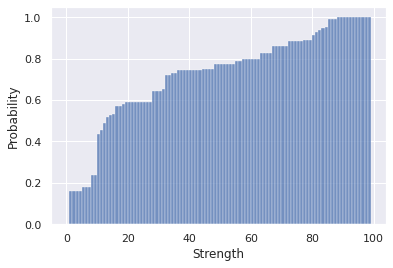

In [24]:
import seaborn as sns
sns.histplot(semi_df, x='Strength', common_norm = True, stat='probability', cumulative=True,bins=[i for i in range(100)])

In [25]:
import statsmodels.api as sm

model = sm.OLS(semi_df['Intermediation (r)'], semi_df[['Intelligence', 'Strength', 'Power']])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Intermediation (r)   R-squared (uncentered):                   0.409
Model:                            OLS   Adj. R-squared (uncentered):              0.395
Method:                 Least Squares   F-statistic:                              30.43
Date:                Sat, 14 Nov 2020   Prob (F-statistic):                    5.11e-15
Time:                        16:46:08   Log-Likelihood:                          498.61
No. Observations:                 135   AIC:                                     -991.2
Df Residuals:                     132   BIC:                                     -982.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intelligence     0.0001   2.51e-05      4.742      0.000    6.94e-05       0.000
Strength       -1.1e-06   1.95e-05     -0.056      0.955   -3.96e-05    3.74e-05
Power        -3.899e-05   2.42e-05     -1.613      0.109   -8.68e-05    8.84e-06
==============================================================================
Omnibus:                      110.521   Durbin-Watson:                   1.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1090.783
Skew:                           2.870   Prob(JB):                    1.38e-237
Kurtosis:                      15.688   Cond. No.                         5.64
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
g.draw()